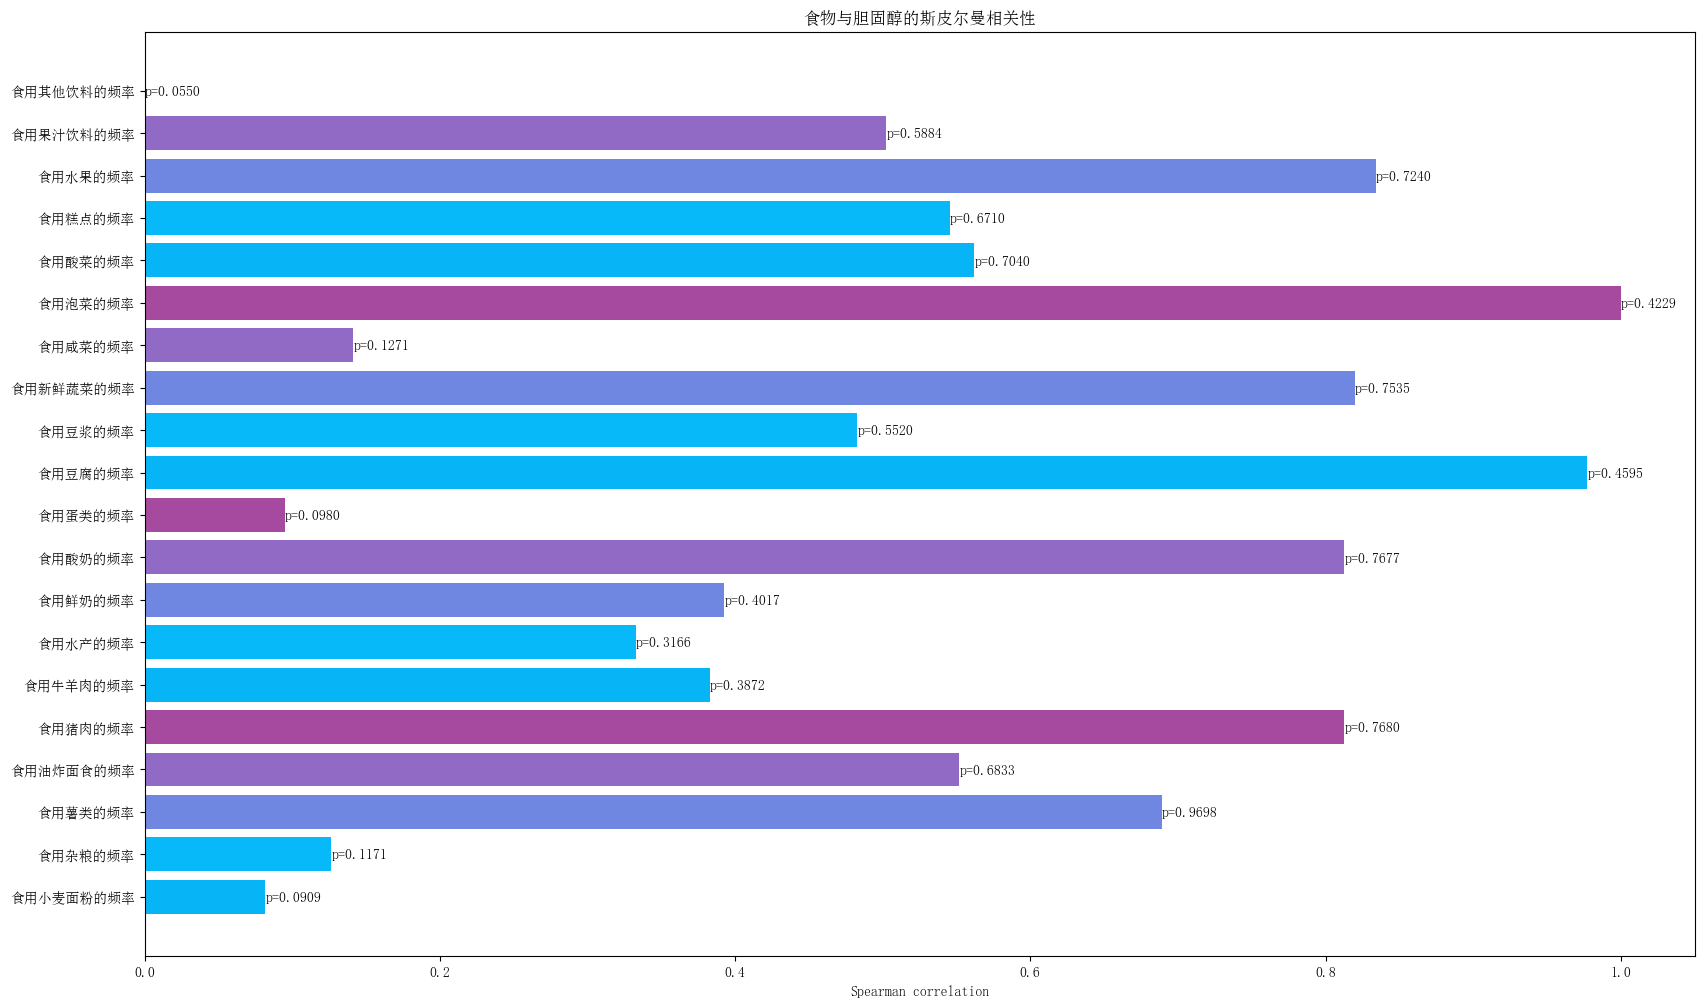

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimSun']  # 指定中文字体
plt.rcParams['axes.unicode_minus'] = False   # 解决负号显示问题

# 读取数据
data = pd.read_excel('output4.xlsx')
data = data.replace([np.inf, -np.inf], np.nan)
data = data.dropna()

food_columns = ['食用小麦面粉的频率','食用杂粮的频率','食用薯类的频率','食用油炸面食的频率','食用猪肉的频率',
                '食用牛羊肉的频率','食用水产的频率','食用鲜奶的频率','食用酸奶的频率',
                '食用蛋类的频率','食用豆腐的频率','食用豆浆的频率','食用新鲜蔬菜的频率',
         '食用咸菜的频率','食用泡菜的频率','食用酸菜的频率','食用糕点的频率','食用水果的频率','食用果汁饮料的频率','食用其他饮料的频率']

y = data['胆固醇']


correlation = []
p_values = []
for food_column in food_columns:
    corr,p_value = spearmanr(data[food_column],y)
    correlation.append(corr)
    p_values.append(p_value)



# 归一化特征的相关性，以便于可视化
correlation_scaled = (correlation - np.min(correlation))/(np.max(correlation) - np.min(correlation))

# 设置列表颜色
colors_food = ['#07B5F6', '#07B9F8', '#7087E1', '#906AC5', '#A54A9E']

# 创建柱状图
fig, ax = plt.subplots(figsize=(20,12))

# 设定颜色
bars = ax.barh(range(len(correlation_scaled)),correlation_scaled,color=colors_food)

# 设置y轴标签
ax.set_yticks(range(len(food_columns)))
ax.set_yticklabels(food_columns)

# 设置x轴标签
ax.set_xlabel('Spearman correlation')

# 将p值显示在柱状图上
for i, bar in enumerate(bars):
    ax.text(bar.get_width(), bar.get_y()+bar.get_height()/2, f'p={p_values[i]:.4f}', va='center')

plt.title('食物与胆固醇的斯皮尔曼相关性')


# 将图像保存为文件
# plt.savefig("spearmanr.png", dpi=1500)

plt.show()